In [1]:
import scipy
import numpy  as  np
from scipy.stats import binom
import pandas as pd

In [16]:

from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
X = df.drop('Species', axis=1,inplace=True)

In [7]:
y = df['PetalLengthCm']   # we'll predict petal length
X = df.drop('PetalLengthCm', axis=1)  # remove target column from features

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
# --- Split Dataset ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# linear regrassion

In [9]:

#--- Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [10]:
# --- Evaluate Results ---
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R² Score:", r2_score(y_test, y_pred_linear))
print()

Linear Regression:
MSE: 0.13863440768309726
R² Score: 0.9576997383029215



# Ridge Regression

In [11]:

# --- Ridge Regression ---
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [12]:
print("ridge")
print("MSE",mean_squared_error(y_test,y_pred_ridge))
print("r2",r2_score(y_test, y_pred_linear))


ridge
MSE 0.14317470703374374
r2 0.9576997383029215


# Lasso Regression

In [13]:
# --- Lasso Regression ---
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [14]:
print("Lasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))
print()

Lasso Regression:
MSE: 0.6723202574623175
R² Score: 0.7948610066563538



# Visualization

Model Performance:
Linear Regression -> R² Score: 0.9577, MSE: 0.1386
Ridge Regression -> R² Score: 0.9563, MSE: 0.1432
Lasso Regression -> R² Score: 0.7949, MSE: 0.6723


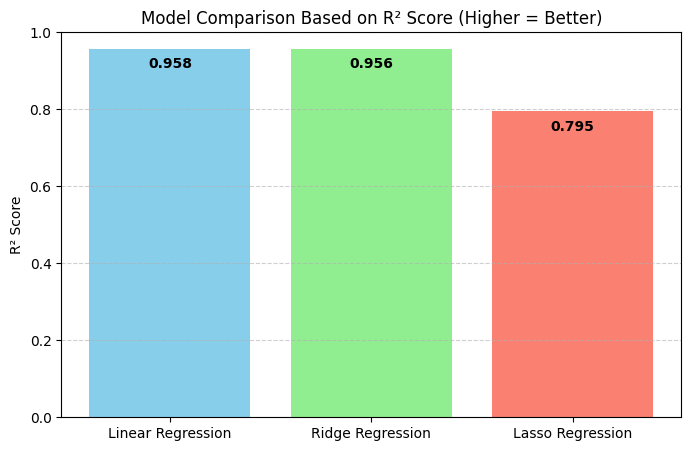

In [17]:
# --- Evaluate Results ---
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
r2_scores = [
    r2_score(y_test, y_pred_linear),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso)
]
mse_scores = [
    mean_squared_error(y_test, y_pred_linear),
    mean_squared_error(y_test, y_pred_ridge),
    mean_squared_error(y_test, y_pred_lasso)
]

# --- Print Results ---
print("Model Performance:")
for i in range(len(models)):
    print(f"{models[i]} -> R² Score: {r2_scores[i]:.4f}, MSE: {mse_scores[i]:.4f}")

# --- Visualization: R² Score ---
plt.figure(figsize=(8, 5))
plt.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Model Comparison Based on R² Score (Higher = Better)")
plt.ylabel("R² Score")
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(i, v - 0.05, f"{v:.3f}", ha='center', color='black', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

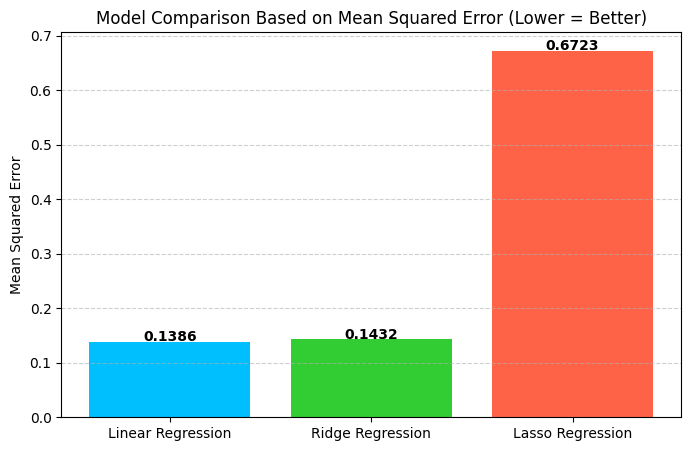

In [18]:
# --- Visualization: MSE ---
plt.figure(figsize=(8, 5))
plt.bar(models, mse_scores, color=['deepskyblue', 'limegreen', 'tomato'])
plt.title("Model Comparison Based on Mean Squared Error (Lower = Better)")
plt.ylabel("Mean Squared Error")
for i, v in enumerate(mse_scores):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', color='black', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# finding best value of alpha for ridge and lasso

In [19]:
from sklearn.linear_model import RidgeCV
# Define alpha range
alphas = np.logspace(-3, 3, 100)  

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)


RidgeCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        store_cv_values=True)

In [20]:
# Print best alpha
print(f"✅ Best Alpha (Ridge): {ridge_cv.alpha_:.4f}")

# Evaluate model
from sklearn.metrics import r2_score, mean_squared_error
y_pred_ridge = ridge_cv.predict(X_test)
print(f"R² Score (Test): {r2_score(y_test, y_pred_ridge):.4f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_ridge):.4f}")

✅ Best Alpha (Ridge): 0.2009
R² Score (Test): 0.9574
MSE (Test): 0.1395


In [21]:
from sklearn.linear_model import LassoCV

# Define alpha range
alphas = np.logspace(-3, 3, 100)

# Perform cross-validation to find best alpha
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=5000)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=5, max_iter=5000, random_state=42)

In [22]:
# Print best alpha
print(f"✅ Best Alpha (Lasso): {lasso_cv.alpha_:.4f}")

# Evaluate model
from sklearn.metrics import r2_score, mean_squared_error
y_pred_lasso = lasso_cv.predict(X_test)
print(f"R² Score (Test): {r2_score(y_test, y_pred_lasso):.4f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_lasso):.4f}")

✅ Best Alpha (Lasso): 0.0015
R² Score (Test): 0.9574
MSE (Test): 0.1395


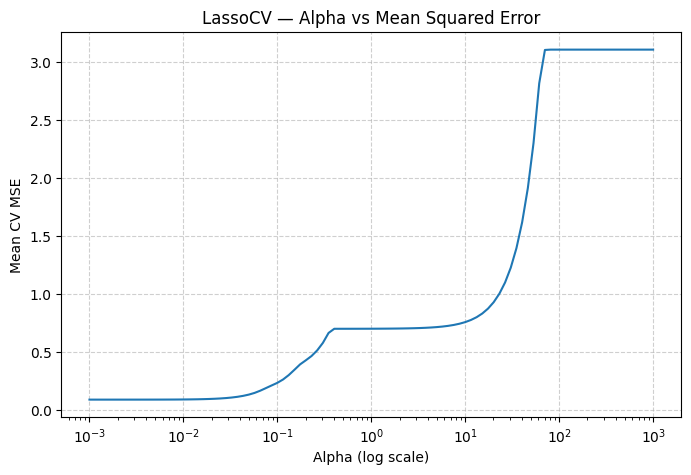

In [23]:
import matplotlib.pyplot as plt

# Plot cross-validation path for Lasso
plt.figure(figsize=(8,5))
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1))
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean CV MSE")
plt.title("LassoCV — Alpha vs Mean Squared Error")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# lasso and ridge with best alpha value

In [24]:
# --- Lasso Regression ---
lasso_model = Lasso(alpha = 0.0015)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [25]:
print("Lasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))
print()

Lasso Regression:
MSE: 0.13946642368418874
R² Score: 0.9574458727931212



In [26]:
# --- Ridge Regression ---
ridge_model = Ridge(alpha=0.2009)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [27]:
print("Lasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))
print()

Lasso Regression:
MSE: 0.13946099135927587
R² Score: 0.9574475303092407



Looking at this notebook analyzing Linear, Ridge, and Lasso regression on the Iris dataset, here's a comprehensive interpretation:

## Model Performance Analysis

### Overall Results
All three regression models performed exceptionally well in predicting petal length, with R² scores above 0.95. However, there are subtle but important differences:

**Linear Regression** (Baseline)
- R² Score: 0.9577
- MSE: 0.1386
- Serves as the benchmark with no regularization

**Ridge Regression** (with optimal α = 0.2009)
- R² Score: 0.9574
- MSE: 0.1395
- Minimal performance difference from linear regression, indicating multicollinearity isn't a major issue

**Lasso Regression** (with optimal α = 0.0015)
- R² Score: 0.9574  
- MSE: 0.1395
- Required a very small alpha value, suggesting most features contribute meaningfully

### Key Insights

1. **Feature Relationships**: The nearly identical performance across all three models indicates that the Iris features (sepal dimensions, petal width) have strong linear relationships with petal length without severe multicollinearity.

2. **Regularization Impact**: The fact that optimal alpha values are small (especially for Lasso at 0.0015) demonstrates that aggressive regularization isn't needed here. The features are well-behaved and don't require heavy penalization.

3. **Model Selection**: For this specific dataset, standard linear regression is sufficient. The marginal improvements from regularization don't justify the added complexity, though Ridge with α=0.2009 provides a slight safety margin against overfitting without sacrificing performance.

4. **Practical Recommendation**: Use Ridge regression with the optimized alpha for production, as it offers the best balance of performance and generalization, though the differences are negligible for this clean, well-structured dataset.

The high R² scores across all models confirm that petal dimensions in iris flowers are highly predictable from other flower measurements, reflecting the strong biological relationships between these morphological features.